In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import pandas as pd

In [373]:
import src.identify_pucks as ip

In [372]:
%reload_ext autoreload
%autoreload 2

## Using functions

In [345]:
img = Image.open('data/crop.jpg')

cv_img = np.array(img) 
#cv_img = img[:, :, ::-1].copy()

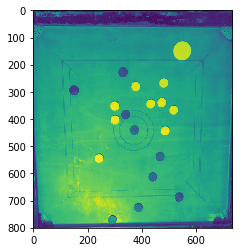

In [346]:
p_img = ip.preprocess_image(cv_img)
plt.imshow(p_img)

In [347]:
black = ip.identify_black_pucks(p_img)

In [349]:
th, threshed = cv2.threshold(p_img, 100, 255, cv2.THRESH_OTSU|cv2.THRESH_BINARY)

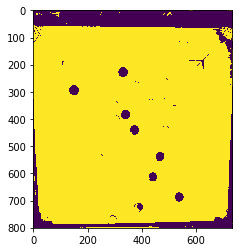

In [351]:
plt.imshow(threshed)

In [356]:
contours = ip.make_contours(threshed)

In [357]:
len(contours)

333

In [368]:
contours

[array([[[700, 800]]], dtype=int32),
 array([[[554, 800]]], dtype=int32),
 array([[[134, 800]],
 
        [[138, 800]]], dtype=int32),
 array([[[130, 800]],
 
        [[131, 800]]], dtype=int32),
 array([[[127, 800]]], dtype=int32),
 array([[[124, 800]]], dtype=int32),
 array([[[575, 797]]], dtype=int32),
 array([[[468, 797]],
 
        [[469, 797]]], dtype=int32),
 array([[[569, 796]],
 
        [[570, 796]]], dtype=int32),
 array([[[559, 795]],
 
        [[559, 796]],
 
        [[561, 796]],
 
        [[560, 795]]], dtype=int32),
 array([[[426, 795]],
 
        [[425, 796]],
 
        [[423, 796]],
 
        [[422, 797]],
 
        [[389, 797]],
 
        [[388, 796]],
 
        [[386, 796]],
 
        [[385, 797]],
 
        [[368, 797]],
 
        [[367, 798]],
 
        [[366, 797]],
 
        [[365, 797]],
 
        [[364, 796]],
 
        [[363, 797]],
 
        [[350, 797]],
 
        [[349, 798]],
 
        [[329, 798]],
 
        [[328, 797]],
 
        [[326, 797]],
 
      

In [374]:
ip.filter_contours(contours,10,30)

[]

## Test

### Loading Image

In [210]:
img = Image.open('data/crop.jpg')

In [211]:
cv_img = np.array(img) 
#cv_img = img[:, :, ::-1].copy()

In [212]:
cv_img_copy = cv_img.copy()

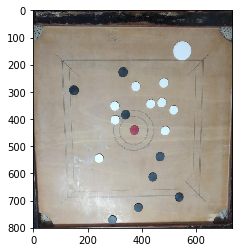

In [213]:
plt.imshow(cv_img)

In [11]:
white_puck = Image.open('data/white_puck.jpg')

In [12]:
cv_white_puck = np.array(white_puck)

### Graying Image

In [14]:
gray = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)

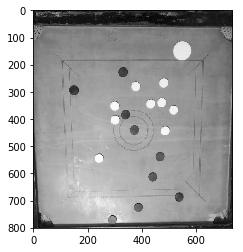

In [15]:
plt.imshow(gray,cmap='gray')

### Bilateral filter

#### What is bilateral filter ?

A bilateral filter is a non-linear, edge-preserving, and noise-reducing smoothing filter for images. It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels. This weight can be based on a Gaussian distribution. Crucially, the weights depend not only on Euclidean distance of pixels, but also on the radiometric differences (e.g., range differences, such as color intensity, depth distance, etc.). This preserves sharp edges.

In [24]:
gray_bi = cv2.bilateralFilter(gray, 11, 17, 17)

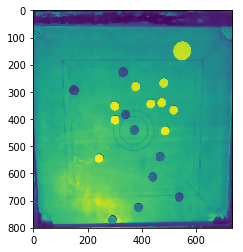

In [25]:
plt.imshow(gray_bi)

In [30]:
edged = cv2.Canny(gray, 30, 200)

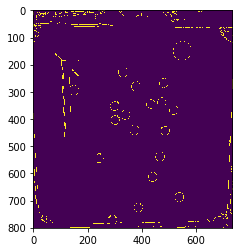

In [29]:
plt.imshow(edged)

### Thresholding

In [31]:
img = gray
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

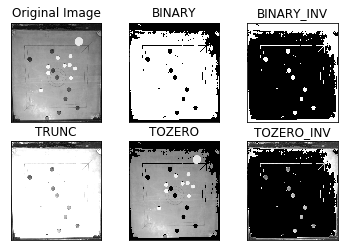

In [32]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

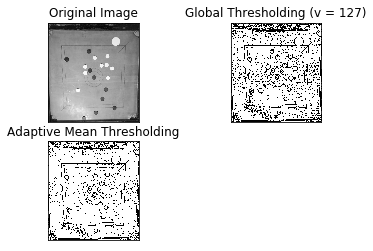

In [33]:
#th1 = cv2.threshold(img,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th2, th3]
for i in range(3):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [54]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

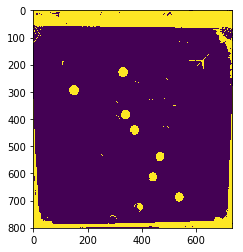

In [56]:
plt.imshow(thresh)

In [62]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

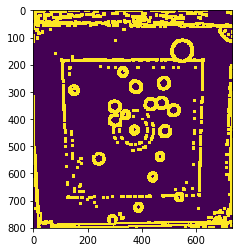

In [63]:
plt.imshow(unknown)

In [65]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

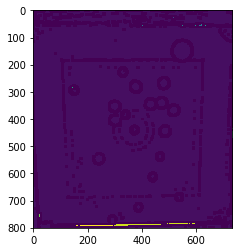

In [67]:
plt.imshow(markers)

In [71]:
markers = cv2.watershed(cv_img,markers)
cv_img[markers == -1] = [255,0,0]

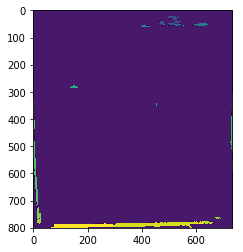

In [73]:
plt.imshow(markers)

In [58]:
gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
cv2.THRESH_BINARY_INV, 11, 1)

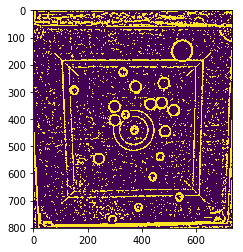

In [59]:
plt.imshow(thresh)

In [36]:
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=4)


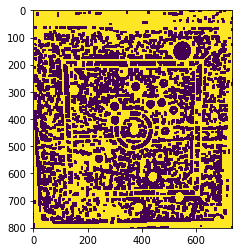

In [37]:
plt.imshow(closing)

In [38]:
cont_img = closing.copy()
contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)

In [39]:
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 2000 or area > 4000:
        continue
    if len(cnt) < 5:
        continue
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(roi, ellipse, (0,255,0), 2)

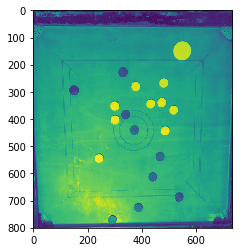

In [43]:
plt.imshow(img)

### Finding round objects in image 

#### How does Hough Circle work ?

In [96]:
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 2)

In [97]:
output = cv_img.copy()

In [98]:
circles

array([[[492.6     , 417.00003 , 381.6     ],
        [498.6     , 406.2     , 390.84003 ],
        [497.40002 , 400.2     , 386.76    ],
        [490.2     , 414.6     , 376.68    ],
        [369.      , 442.2     ,  49.56    ],
        [257.40002 , 414.6     , 408.96    ],
        [366.6     , 546.60004 , 249.12001 ],
        [369.      , 533.4     , 247.44    ],
        [360.6     , 546.60004 , 251.16002 ],
        [366.6     , 330.6     , 256.56003 ],
        [349.80002 , 306.6     , 246.00002 ],
        [372.6     , 444.6     ,  71.880005],
        [369.      , 437.40002 ,  74.4     ],
        [366.6     , 438.6     ,  75.240005],
        [372.6     , 442.2     ,  52.680004],
        [375.      , 439.80002 ,  69.96    ],
        [382.2     , 445.80002 ,  62.52    ],
        [366.6     , 580.2     , 222.6     ],
        [402.6     , 576.60004 , 210.12001 ],
        [433.80002 , 534.60004 , 182.76001 ],
        [475.80002 , 504.6     , 180.96    ],
        [377.40002 , 433.80002 ,  

In [99]:
if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
	circles = np.round(circles[0, :]).astype("int")
 
	# loop over the (x, y) coordinates and radius of the circles
	for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		# corresponding to the center of the circle
		cv2.circle(output, (x, y), r, (0, 255, 0), 4)
		cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

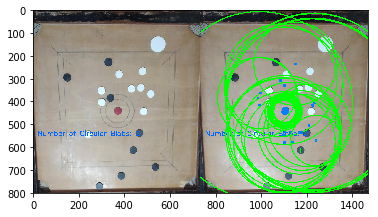

In [100]:
plt.imshow(np.hstack([cv_img, output]))

### Circular Blob detection

In [101]:
image = cv_img

In [106]:
params = cv2.SimpleBlobDetector_Params() 
  
# Set Area filtering parameters 
params.filterByArea = True
params.minArea = 1
  
# Set Circularity filtering parameters 
params.filterByCircularity = True 
params.minCircularity = 0.9
  
# Set Convexixty filtering parameters 
params.filterByConvexity = True
params.minConvexity = 0.3
      
# Set inertia filtering parameters 
params.filterByInertia = True
params.minInertiaRatio = 0.01
  
# Create a detector with the parameters 
detector = cv2.SimpleBlobDetector_create(params) 
      
# Detect blobs 
keypoints = detector.detect(image) 
  
# Draw blobs on our image as red circles 
blank = np.zeros((1, 1))  



In [107]:
blobs = cv_img.copy()
for marker in keypoints:
	blobs = cv2.drawMarker(cv_img, tuple(int(i) for i in marker.pt), color=(0, 255, 0))


#blobs = cv2.drawMarker(image, keypoints, blank, (0, 0, 255), 
#                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 
  
number_of_blobs = len(keypoints) 
text = "Number of Circular Blobs: " + str(len(keypoints)) 
#cv2.putText(blobs, text, (20, 550), 
#            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2) 

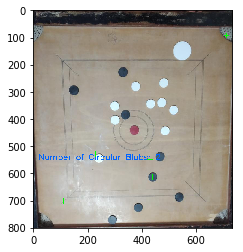

In [108]:
plt.imshow(blobs)

### Next

In [28]:
original = cv_img
retval, image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)



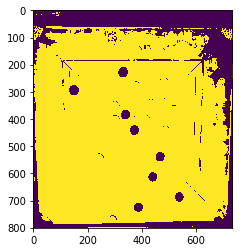

In [29]:
plt.imshow(image)

In [30]:
el = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
image = cv2.dilate(image, el, iterations=6)

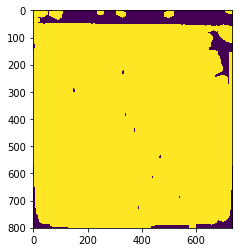

In [31]:
plt.imshow(image)

In [33]:
contours, hierarchy = cv2.findContours(
    image,
    cv2.RETR_LIST,
    cv2.CHAIN_APPROX_SIMPLE
)

drawing = cv2.imread("test.jpg")

centers = []
radii = []
for contour in contours:
    area = cv2.contourArea(contour)

    # there is one contour that contains all others, filter it out
    if area > 500:
        continue

    br = cv2.boundingRect(contour)
    radii.append(br[2])

    m = cv2.moments(contour)
    center = (int(m['m10'] / m['m00']), int(m['m01'] / m['m00']))
    centers.append(center)

### Feature detection

#### Testing orb

In [21]:
orb = cv2.ORB_create()

In [22]:
kp = orb.detect(cv_img,None)

In [24]:
# compute the descriptors with ORB
kp, des = orb.compute(cv_, kp)

In [29]:
img2 = cv2.drawKeypoints(cv_img,kp,color=(0,255,0), flags=0,outImage = None)

#### Apply orb

In [98]:
orb = cv2.ORB_create(nfeatures=100000, scoreType=cv2.ORB_FAST_SCORE)

In [99]:
kp1, des1 = orb.detectAndCompute(cv_img,None)

In [100]:
orb = cv2.ORB_create(nfeatures=100000, scoreType=cv2.ORB_FAST_SCORE)

In [101]:

kp2, des2 = orb.detectAndCompute(cv_white_puck,None)

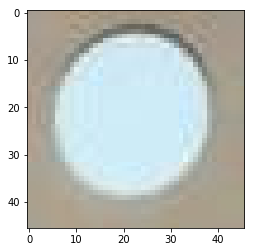

In [102]:
plt.imshow(cv_white_puck)

In [103]:
des1

array([[  9, 179, 211, ..., 198, 131, 213],
       [112,  32, 147, ...,   8, 106, 142],
       [ 29, 122,  86, ..., 183, 106, 157],
       ...,
       [ 43, 157,  34, ...,  15, 253, 222],
       [138, 202, 106, ..., 142,  61, 207],
       [ 35,   3,  67, ..., 138, 112, 168]], dtype=uint8)

In [104]:
kp2

[]

In [105]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(cv_img,kp1,img2,kp2,matches[:10], flags=2,outImg = None)

plt.imshow(img3)

error: OpenCV(3.4.2) /io/opencv/modules/core/src/batch_distance.cpp:238: error: (-215:Assertion failed) type == src2.type() && src1.cols == src2.cols && (type == 5 || type == 0) in function 'batchDistance'


#### fast template match

In [79]:
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

In [87]:
fast = cv2.FastFeatureDetector_create()
# Obtain Key points, by default non max suppression is On
# to turn off set fast.setBool('nonmaxSuppression', False)
keypoints1 = fast.detect(gray, None)
print ("Number of keypoints Detected: ", len(keypoints1))

Number of keypoints Detected:  2357


In [88]:
keypoints1 = fast.detect(gray, None)
keypoints1, descriptors1 = brief.compute(gray, keypoints1)
print ("Number of keypoints Detected: ", len(keypoints1))
 

Number of keypoints Detected:  1495


In [89]:
fast = cv2.FastFeatureDetector_create()
# Obtain Key points, by default non max suppression is On
# to turn off set fast.setBool('nonmaxSuppression', False)
keypoints2 = fast.detect(cv_white_puck, None)
print ("Number of keypoints Detected: ", len(keypoints2))

Number of keypoints Detected:  21


In [91]:
keypoints2 = fast.detect(cv_white_puck, None)
print ("Number of keypoints Detected: ", len(keypoints2))
keypoints2, descriptors = brief.compute(cv_white_puck, keypoints2)
print ("Number of keypoints Detected: ", len(keypoints2))

Number of keypoints Detected:  21
Number of keypoints Detected:  0


#### Template Matching

In [43]:
template=cv2.imread('data/white_puck.png',0)
#result of template matching of object over an image
result=cv2.matchTemplate(gray,template,cv2.TM_CCOEFF)
sin_val, max_val, min_loc, max_loc=cv2.minMaxLoc(result)

In [47]:
top_left=max_loc
#increasing the size of bounding rectangle by 50 pixels
bottom_right=(top_left[0]+50,top_left[1]+50)
test  = cv2.rectangle(cv_img, top_left, bottom_right, (0,255,0),5)

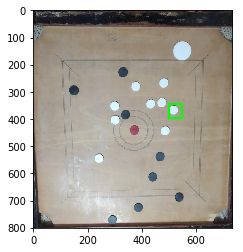

In [48]:
plt.imshow(test)

###  Contour finding

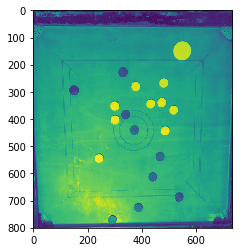

In [16]:
plt.imshow(gray)

####  Finding threshold

In [17]:
th, threshed = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY) 

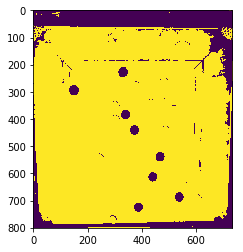

In [23]:
plt.imshow(threshed)

#### Finding edges

In [18]:
edges = cv2.Canny(gray,50,150,apertureSize = 3) 

In [19]:
lines = cv2.HoughLines(edges,1,np.pi/180, 200) 

In [20]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

In [21]:
lines_edges = cv2.addWeighted(cv_img, 0.8, line_image, 1, 0)

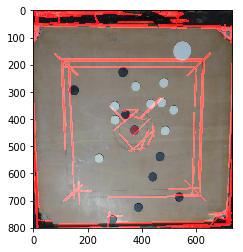

In [22]:
plt.imshow(lines_edges)

#### Finding contours

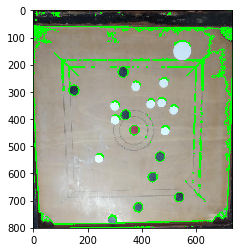

In [61]:
_,contours, hierarchy = cv2.findContours(threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_test = cv2.drawContours(cv_img, contours, -1, (0,255,0), 3)
thresh = cv2.dilate(threshed, None, iterations=4)
plt.imshow(img_test)

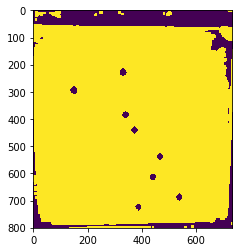

In [62]:
threshed = cv2.dilate(threshed, None, iterations=4)
plt.imshow(threshed)

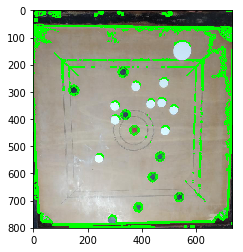

In [63]:
_,contours, hierarchy = cv2.findContours(threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_test = cv2.drawContours(cv_img, contours, -1, (0,255,0), 3)
plt.imshow(img_test)

In [360]:
radius_data = []
final_contours = []
for index,cnt in enumerate(contours):
    #print("index",index)
    area = cv2.contourArea(cnt)
    #print(area)
    perimeter = cv2.arcLength(cnt,True)
    #print(perimeter)
    (x,y),radius = cv2.minEnclosingCircle(cnt)
    #print(x,y,radius)
    radius_data.append(radius)
    if radius > 10 and radius < 40:
        final_contours.append(cnt)
    

In [361]:
np.max(np.array(radius_data))
print(len(final_contours))

50


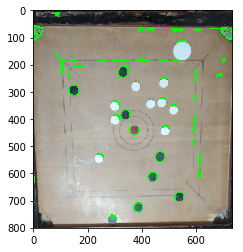

In [362]:
#_,contours, hierarchy = cv2.findContours(threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_test = cv2.drawContours(cv_img, final_contours, -1, (0,255,0), 3)
plt.imshow(img_test)

1.1181340217590332


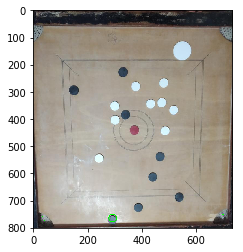

In [209]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
print(radius)
center = (int(x),int(y))
radius = int(radius)
img_test_2 = cv2.circle(cv_img,center,radius,(0,255,0),2)
plt.imshow(img_test_2)

#### Finding circles

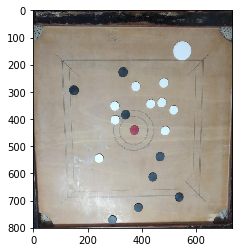

In [39]:
plt.imshow(cv_img)

In [78]:
cv_img.shape

(801, 734, 3)

In [122]:
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp = 4, minDist = 1, maxRadius=20)

In [123]:
np.round(circles[0, :]).astype("int")

array([[ 18,  70,  18],
       [150, 294,  18],
       [438, 614,  17],
       [466, 538,  16],
       [706,  82,  18],
       [330, 226,  18],
       [390,  30,  13],
       [706, 746,  13],
       [ 30,  34,  18],
       [290, 770,  18],
       [478, 266,  18],
       [598,  22,  18],
       [386, 726,  18],
       [242, 546,  18],
       [486, 442,  18],
       [302, 402,  18],
       [538, 686,  18],
       [610, 218,  18],
       [142, 194,  18]])

In [124]:
output = np.copy(cv_img) * 0
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    print(circles)
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

[[ 18  70  18]
 [150 294  18]
 [438 614  17]
 [466 538  16]
 [706  82  18]
 [330 226  18]
 [390  30  13]
 [706 746  13]
 [ 30  34  18]
 [290 770  18]
 [478 266  18]
 [598  22  18]
 [386 726  18]
 [242 546  18]
 [486 442  18]
 [302 402  18]
 [538 686  18]
 [610 218  18]
 [142 194  18]]


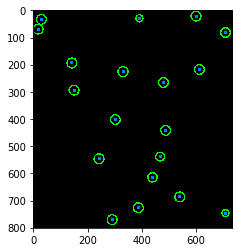

In [125]:
plt.imshow(output)

### Finding contours 2

#### finding black pucks 

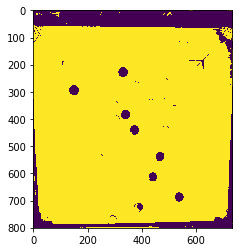

In [77]:
th, threshed = cv2.threshold(gray, 100, 255, cv2.THRESH_OTSU|cv2.THRESH_BINARY)
plt.imshow(threshed)

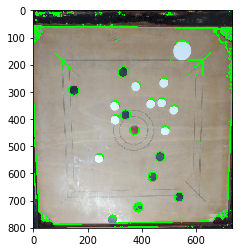

In [132]:
_,contours, hierarchy = cv2.findContours(threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_test = cv2.drawContours(cv_img, contours, -1, (0,255,0), 3)
plt.imshow(img_test)

In [187]:
radius_data = []
area_data = []
final_contours = []
for index,cnt in enumerate(contours):
    #print("index",index)
    area = cv2.contourArea(cnt)
    #print(area)
    perimeter = cv2.arcLength(cnt,True)
    #print(perimeter)
    (x,y),radius = cv2.minEnclosingCircle(cnt)
    #print(x,y,radius)
    if radius > 10 and radius < 30 and area > 3.14*100:
        area_data.append(area)
        radius_data.append(radius)
        final_contours.append(cnt)

In [188]:
area_data

[537.5, 924.5, 890.5, 926.0, 921.0, 958.5, 1084.0, 1098.5]

In [189]:
radius_data

[16.67091941833496,
 17.9514217376709,
 17.742597579956055,
 18.06947898864746,
 18.43918800354004,
 18.454256057739258,
 19.281177520751953,
 20.012596130371094]

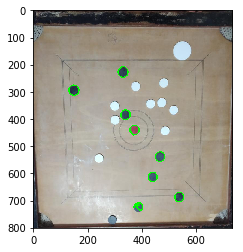

In [201]:
img_test = cv2.drawContours(cv_img.copy(), final_contours, -1, (0,255,0), 3)
plt.imshow(img_test)

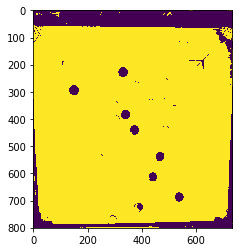

In [195]:
th, threshed2 = cv2.threshold(gray, 0, 100, cv2.THRESH_OTSU|cv2.THRESH_BINARY)
plt.imshow(threshed2)

#### hsitogram analysis

In [239]:
gray.shape

(801, 734)

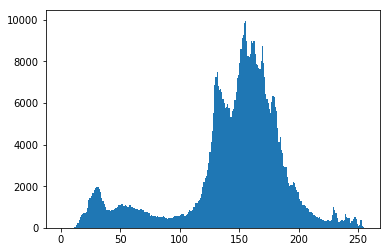

In [265]:
plt.hist(gray.ravel(),256,[0,256]); plt.show()

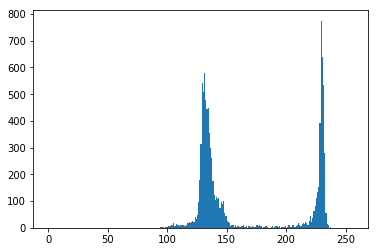

In [259]:
plt.hist(gray[100:200,500:600].ravel(),256,[0,256]); plt.show()

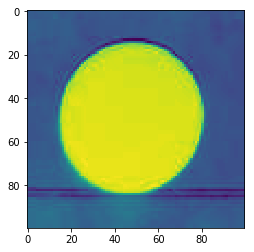

In [244]:
plt.imshow(gray[100:200,500:600])

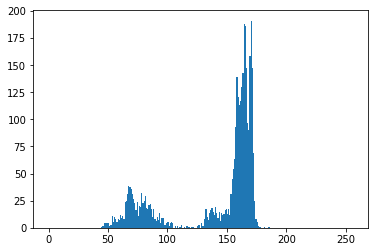

In [260]:
plt.hist(gray[650:700,500:570].ravel(),256,[0,256]); plt.show()

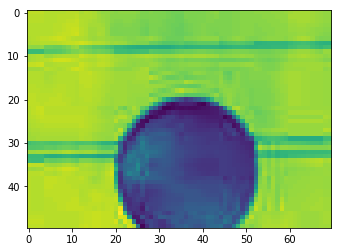

In [258]:
plt.imshow(gray[650:700,500:570])

#### finding white pucks

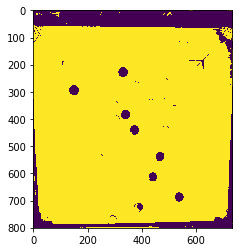

In [327]:
th, threshed2 = cv2.threshold(gray, 100, 255, cv2.THRESH_OTSU|cv2.THRESH_BINARY)
plt.imshow(threshed2)

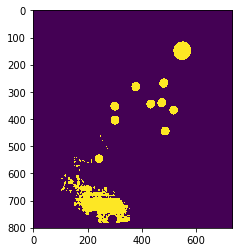

In [335]:
th, threshed2 = cv2.threshold(gray, 200, 250,  cv2.THRESH_BINARY)
plt.imshow(threshed2)

In [336]:
_,contours, hierarchy = cv2.findContours(threshed2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_test = cv2.drawContours(cv_img.copy(), contours, -1, (0,255,0), 3)
#print(contours)

In [340]:
radius_data = []
area_data = []
final_contours = []
for index,cnt in enumerate(contours):
    #print("index",index)
    area = cv2.contourArea(cnt)
    #print(area)
    perimeter = cv2.arcLength(cnt,True)
    #print(perimeter)
    (x,y),radius = cv2.minEnclosingCircle(cnt)
    #print(x,y,radius)
    if radius > 30 and radius < 40 and area > 3.14*900:
        area_data.append(area)
        radius_data.append(radius)
        final_contours.append(cnt)

In [341]:
print(area_data)
print(radius_data)

[3479.0]
[34.73236083984375]


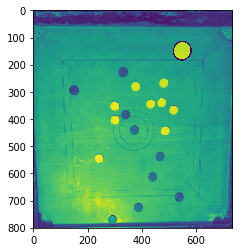

In [342]:
img_test = cv2.drawContours(gray.copy(), final_contours, -1, (0,255,0), 3)
plt.imshow(img_test)